In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [7]:
df = pd.read_excel(r'C:\Users\Lenovo\Python\ANZ\ANZ_synthesised_transaction_dataset.xlsx')

In [8]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [10]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


In [12]:
print(df['amount'].describe())

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64


In [13]:
print(df['amount'].value_counts())

33.00     168
39.00     119
29.00     116
36.00     107
45.00     102
         ... 
37.46       1
133.95      1
16.57       1
2.08        1
30.77       1
Name: amount, Length: 4457, dtype: int64


In [14]:
df.shape

(12043, 23)

In [15]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [16]:
df.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [17]:
df.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

In [18]:
df.first_name.value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

In [19]:
df.drop(['bpay_biller_code','merchant_code', 'currency','country'],axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  object        
 14  amount

In [21]:
df.duplicated().sum()

0

In [22]:
df['age_group'] = pd.cut(df.age, [0, 20 , 30, 40, 50, 60, 99999], labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60>'])

In [23]:
df.loc[:,['extraction']] = df.loc[:,['extraction']].apply(pd.to_datetime, errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   account            12043 non-null  object             
 3   long_lat           12043 non-null  object             
 4   txn_description    12043 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         12043 non-null  object             
 7   balance            12043 non-null  float64            
 8   date               12043 non-null  datetime64[ns]     
 9   gender             12043 non-null  object             
 10  age                12043 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

In [25]:
df['month'] =df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()
df['hour']= df.extraction.dt.hour

In [26]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,age_group,month,day,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,20-30,August,Wednesday,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,20-30,August,Wednesday,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,30-40,August,Wednesday,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,30-40,August,Wednesday,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,20-30,August,Wednesday,1


In [27]:
df.card_present_flag = df.card_present_flag.astype('Int64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   Int64              
 2   account            12043 non-null  object             
 3   long_lat           12043 non-null  object             
 4   txn_description    12043 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         12043 non-null  object             
 7   balance            12043 non-null  float64            
 8   date               12043 non-null  datetime64[ns]     
 9   gender             12043 non-null  object             
 10  age                12043 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

In [29]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [30]:
df['month'] =df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()
df['hour']= df.extraction.dt.hour

In [31]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,age_group,month,day,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,20-30,August,Wednesday,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,20-30,August,Wednesday,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,30-40,August,Wednesday,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,30-40,August,Wednesday,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,20-30,August,Wednesday,1


In [32]:
df.card_present_flag = df.card_present_flag.astype('Int64')

In [33]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,age_group,month,day,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,20-30,August,Wednesday,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,20-30,August,Wednesday,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,30-40,August,Wednesday,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,30-40,August,Wednesday,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,20-30,August,Wednesday,1


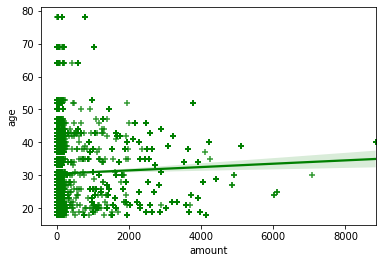

In [34]:
sns.regplot(x = "amount", y = "age", data = df, color='g', marker='+')
plt.show()

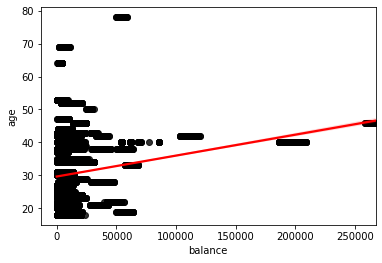

In [35]:
sns.regplot(x = "balance", y = "age", data = df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

In [36]:
cols = ['card_present_flag', 'status', 'txn_description' , 'movement' , 'gender', 'merchant_state', 'age']

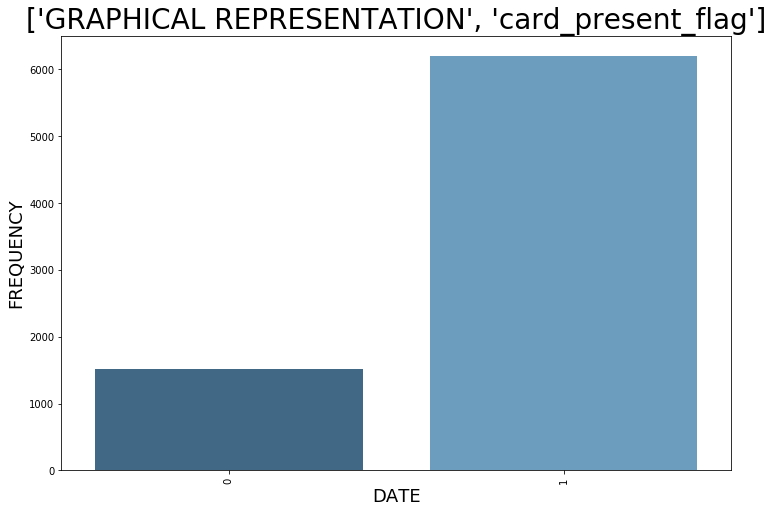

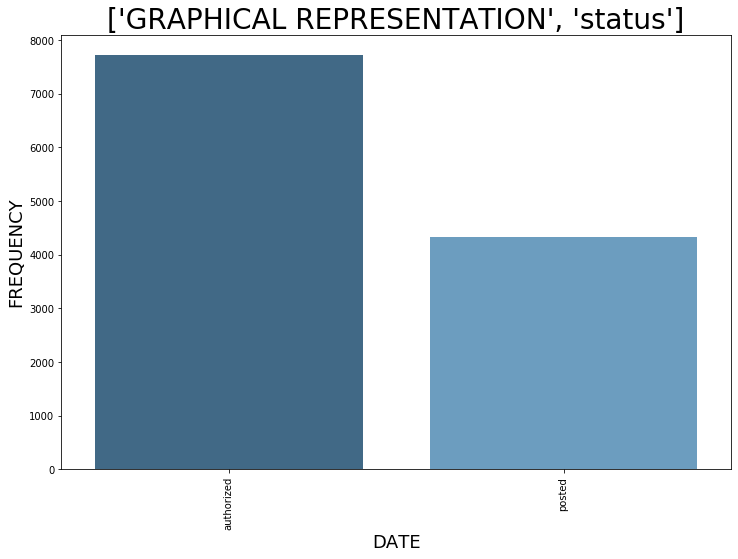

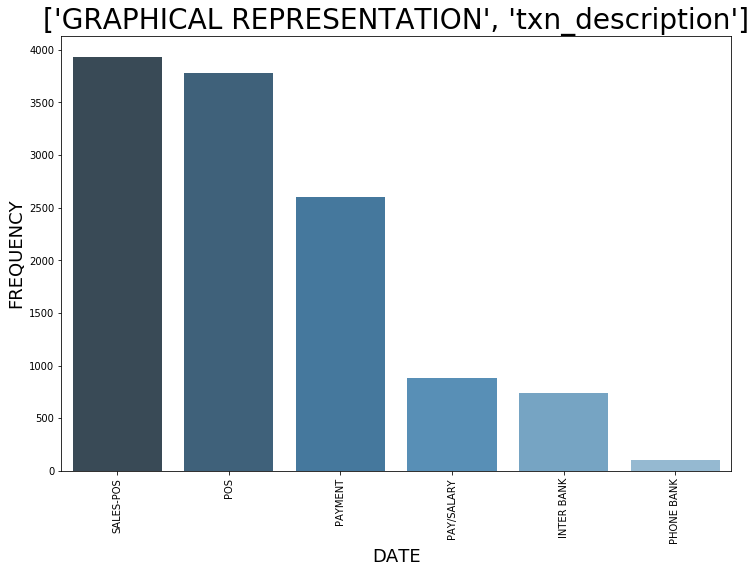

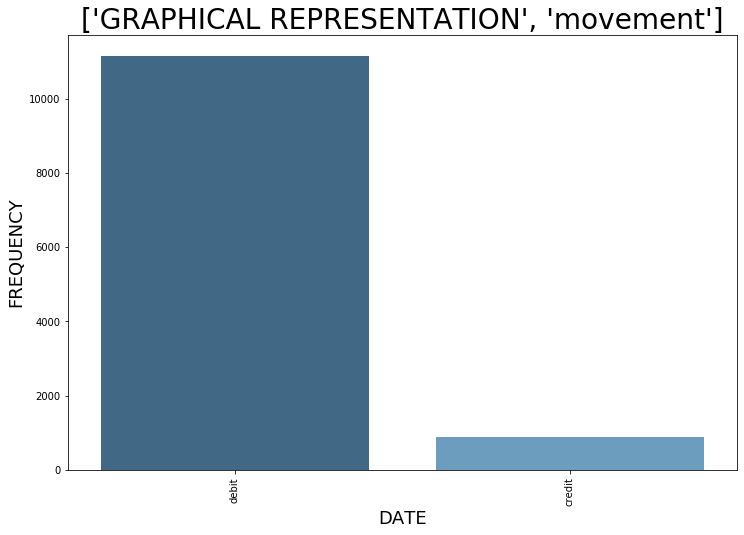

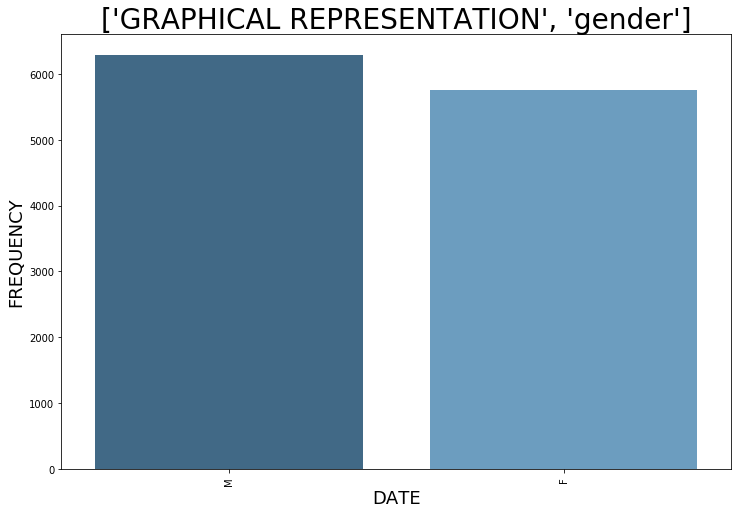

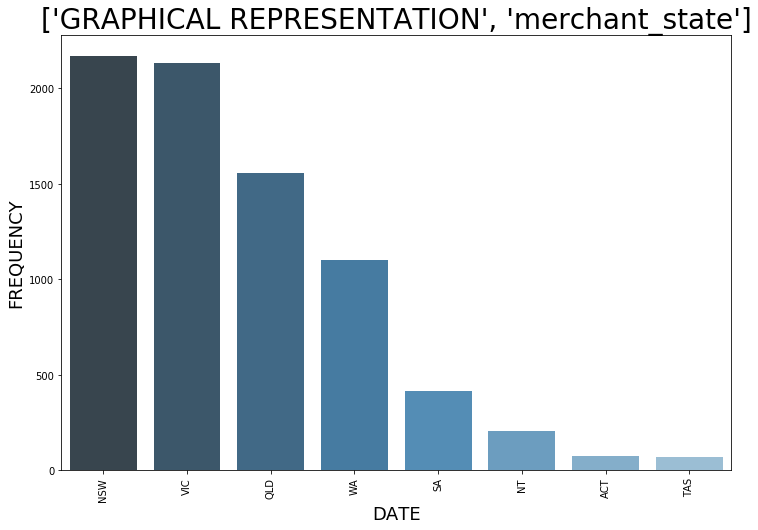

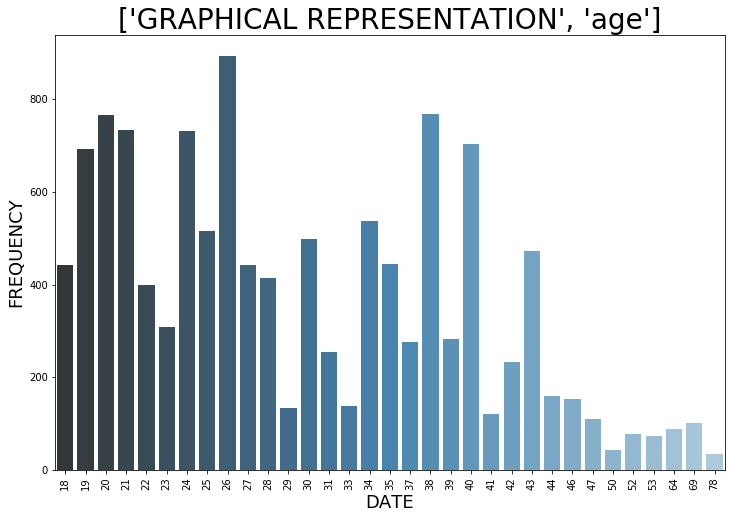

In [37]:
for c in cols:
    x_axis = df[c].value_counts().index
    y_axis = df[c].value_counts().values
    plt.figure(figsize=(12, 8))
    sns.barplot(x = x_axis, y = y_axis, palette=("Blues_d"))
    plt.xticks(rotation=90)
    plt.title(['GRAPHICAL REPRESENTATION', c], fontsize = 28, color='black')
    plt.xlabel('DATE', fontsize = 18)
    plt.ylabel('FREQUENCY', fontsize = 18)
    plt.show()

TOTAL SALARY : 1676576.85
TOTAL SPENDING : 586707.35


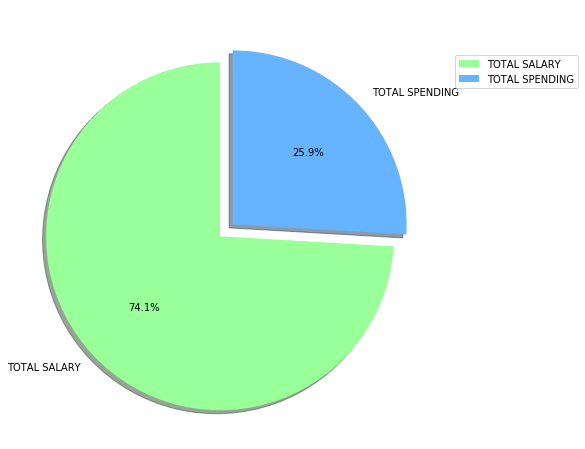

In [38]:
total_salary = df.amount[(df.movement == "credit")].sum()
total_spending = df.amount[(df.movement == "debit")].sum()
print("TOTAL SALARY :", total_salary)
print("TOTAL SPENDING :", total_spending)
pie = [total_salary, total_spending]
fig, ax = plt.subplots(figsize=(12, 8))
label = ['TOTAL SALARY', 'TOTAL SPENDING']
explode = (0.1, 0)
ax.pie(pie, autopct = "%.1f%%", labels = label, explode = explode, startangle = 90, colors = ['#99ff99','#66b3ff'], shadow=True)
ax.legend(frameon=True, bbox_to_anchor = (1,0.9))
plt.show()

TOTAL MALE SALARY: 972920.6200000001
TOTAL MALE SPENDING: 320040.94999999995


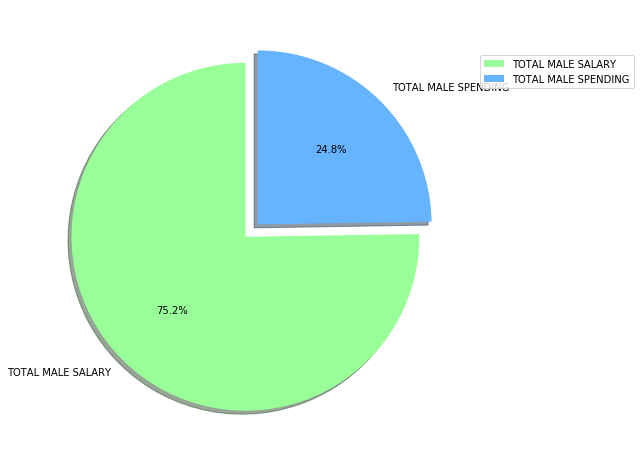

In [39]:
total_salary_male = df.amount[(df.movement == "credit") & (df.gender == 'M')].sum()
total_spending_male = df.amount[(df.movement == "debit") & (df.gender == 'M')].sum()
print('TOTAL MALE SALARY:', total_salary_male)
print('TOTAL MALE SPENDING:',total_spending_male)
pie_male = [total_salary_male, total_spending_male]

plt.figure(figsize=(12,8))
label = ['TOTAL MALE SALARY',
        'TOTAL MALE SPENDING']
explode = (0.1, 0)
plt.pie(pie_male, autopct="%.1f%%", labels =  label, explode = explode,startangle=90, colors = ['#99ff99','#66b3ff'], shadow=True)
plt.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

TOTAL FEMALE SALARY: 703656.23
TOTAL FEMALE SPENDING: 266666.4


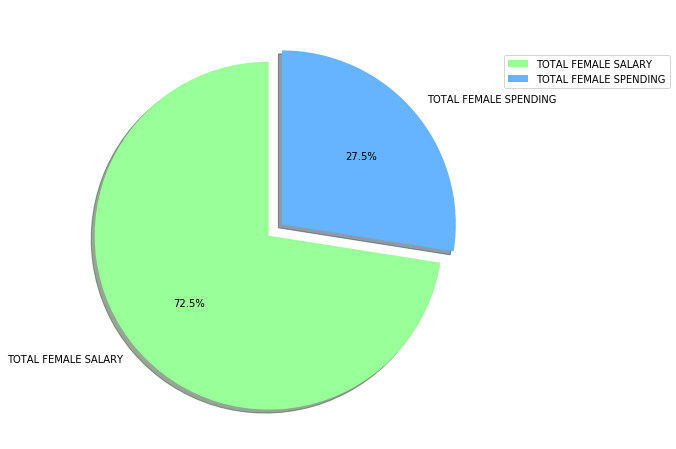

In [40]:
total_salary_female = df.amount[(df.movement == "credit") & (df.gender == 'F')].sum()
total_spending_female = df.amount[(df.movement == "debit") & (df.gender == 'F')].sum()
print('TOTAL FEMALE SALARY:',total_salary_female)
print('TOTAL FEMALE SPENDING:',total_spending_female)
pie_female = [total_salary_female, total_spending_female]

plt.figure(figsize=(12,8))
label = ['TOTAL FEMALE SALARY',
        'TOTAL FEMALE SPENDING']
explode = (0.1, 0)
plt.pie(pie_female, autopct="%.1f%%", labels =  label, explode = explode,startangle=90, colors = ['#99ff99','#66b3ff'], shadow=True)
plt.legend(frameon=True, bbox_to_anchor=(1,0.9))
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   Int64              
 2   account            12043 non-null  object             
 3   long_lat           12043 non-null  object             
 4   txn_description    12043 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         12043 non-null  object             
 7   balance            12043 non-null  float64            
 8   date               12043 non-null  datetime64[ns]     
 9   gender             12043 non-null  object             
 10  age                12043 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

In [42]:
df['day'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: day, dtype: int64

In [43]:
df['day'] = df.date.dt.dayofweek
df['day'].replace({0: '1_Monday',1: '2_Tuesday',2: '3_Wednesday',3: '4_Thursday',4: '5_Friday',5: '6_Saturday',6: '7_Sunday'}, inplace = True)

In [44]:
df['month'] = df.date.dt.month

In [45]:
salary_data = df[df.movement == "credit"]
spending_data = df[df.movement == "debit"]

In [46]:
daily_amount_spent = spending_data.groupby('day')['amount'].sum().reset_index()
daily_amount_spent.sort_values(by = 'day')

,day,amount
0,1_Monday,65412.91
1,2_Tuesday,74240.86
2,3_Wednesday,94959.44
3,4_Thursday,87677.36
4,5_Friday,89239.66
5,6_Saturday,93002.56
6,7_Sunday,82174.56


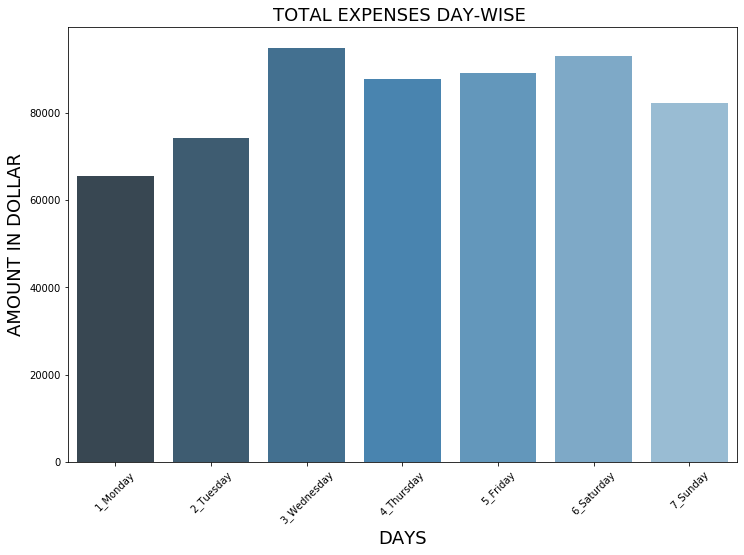

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = daily_amount_spent.day, y = daily_amount_spent.amount, ax= ax, palette=("Blues_d"))
plt.title('TOTAL EXPENSES DAY-WISE ',fontsize = 18,color='black')
plt.xlabel('DAYS', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.xticks(rotation = 45)
plt.show()

In [48]:
daily_amount_spent = spending_data.groupby('day')['amount'].mean().reset_index()

In [49]:
daily_amount_spent.sort_values(by = 'day')

,day,amount
0,1_Monday,56.732793
1,2_Tuesday,55.946390
2,3_Wednesday,50.216520
3,4_Thursday,52.881399
4,5_Friday,47.670759
5,6_Saturday,54.419286
6,7_Sunday,53.015845


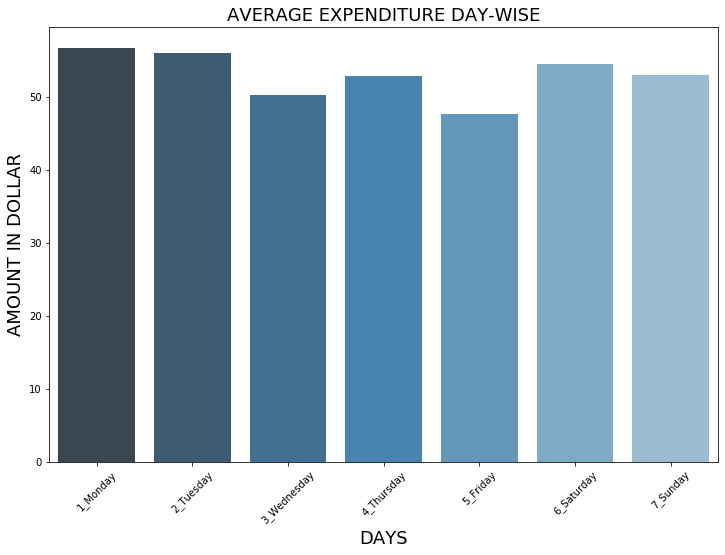

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = daily_amount_spent.day, y = daily_amount_spent.amount, ax= ax, palette=("Blues_d"))
plt.title('AVERAGE EXPENDITURE DAY-WISE',fontsize = 18, color='black')
plt.xlabel('DAYS', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [51]:
daily_amount_spent_line = spending_data.groupby(['day', 'date'])['amount'].mean().reset_index()

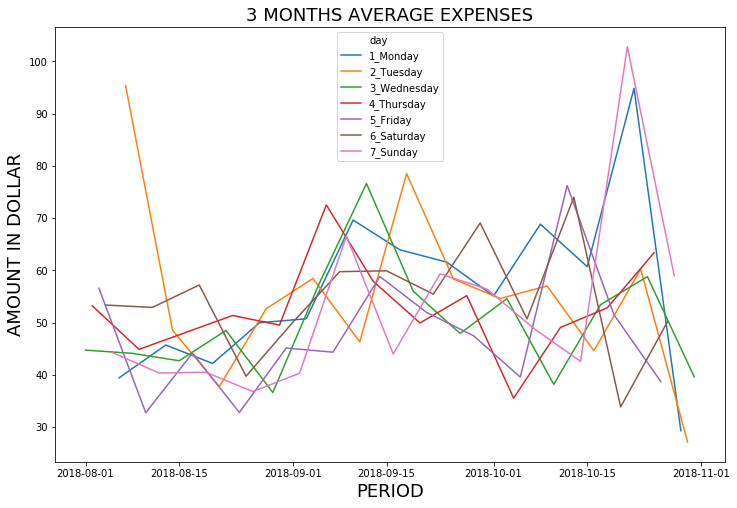

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = daily_amount_spent_line.date, y = daily_amount_spent_line.amount, hue = daily_amount_spent_line.day, ax= ax)
plt.title('3 MONTHS AVERAGE EXPENSES',fontsize = 18,color='black')
plt.xlabel('PERIOD', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.show()

In [53]:
spending_data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,age_group,month,day,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,20-30,8,3_Wednesday,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,20-30,8,3_Wednesday,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,30-40,8,3_Wednesday,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,30-40,8,3_Wednesday,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,20-30,8,3_Wednesday,1


In [54]:
spending_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11160 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             11160 non-null  object             
 1   card_present_flag  7717 non-null   Int64              
 2   account            11160 non-null  object             
 3   long_lat           11160 non-null  object             
 4   txn_description    11160 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         11160 non-null  object             
 7   balance            11160 non-null  float64            
 8   date               11160 non-null  datetime64[ns]     
 9   gender             11160 non-null  object             
 10  age                11160 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

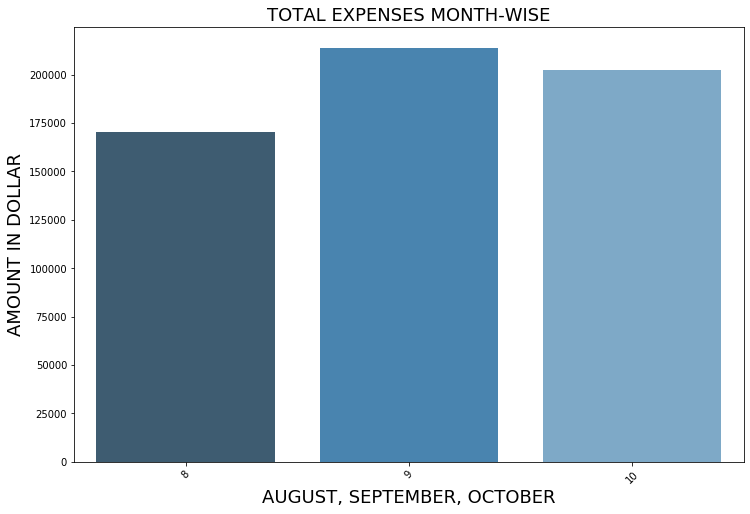

In [55]:
monthly_amount_spent = spending_data.groupby(['month'])['amount'].sum().reset_index()
monthly_amount_spent.sort_values(by = 'month')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = monthly_amount_spent.month, y = monthly_amount_spent.amount, ax= ax, palette=("Blues_d"))
plt.title('TOTAL EXPENSES MONTH-WISE',fontsize = 18,color='black')
plt.xlabel('AUGUST, SEPTEMBER, OCTOBER', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.xticks(rotation = 45)
plt.show()

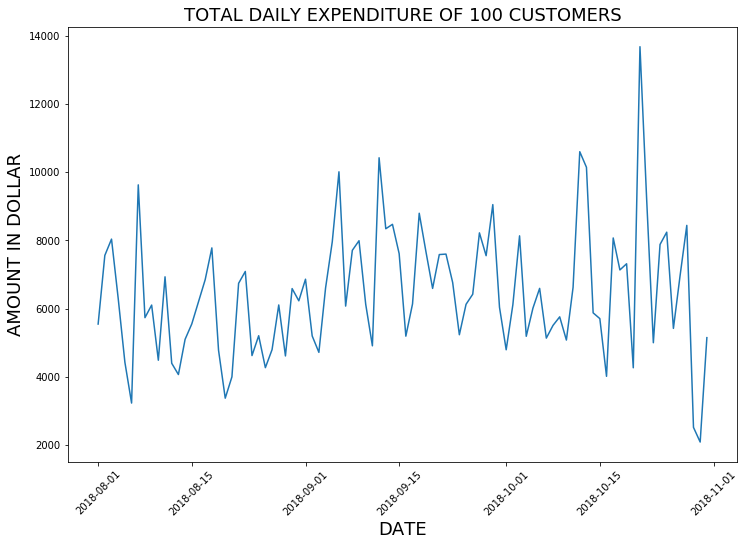

In [56]:
daily_amount_spent = spending_data.groupby('date')['amount'].sum()

plt.figure(figsize=(12, 8))
sns.lineplot(x = daily_amount_spent.index, y = daily_amount_spent.values)
plt.title('TOTAL DAILY EXPENDITURE OF 100 CUSTOMERS',fontsize = 18,color='black')
plt.xlabel('DATE', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.xticks(rotation = 45)
plt.show()

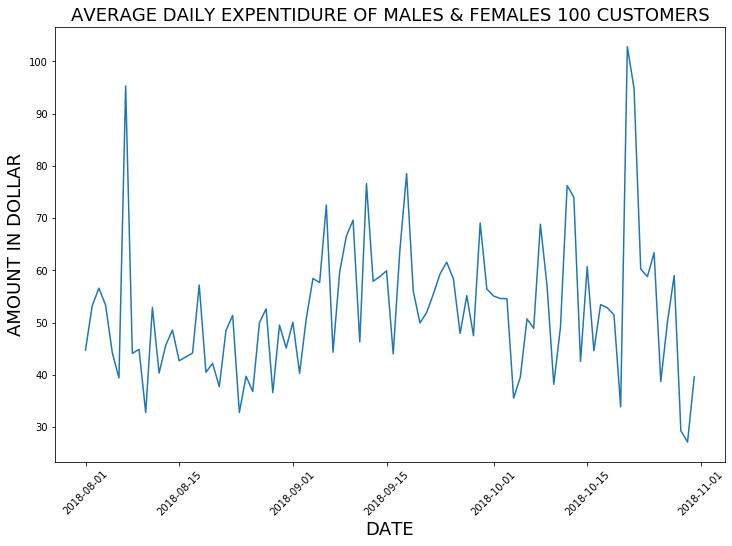

In [57]:
daily_amount_spent = spending_data.groupby('date')['amount'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x = daily_amount_spent.index, y = daily_amount_spent.values)
plt.title('AVERAGE DAILY EXPENTIDURE OF MALES & FEMALES 100 CUSTOMERS',fontsize = 18, color='black')
plt.xlabel('DATE', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.xticks(rotation = 45)
plt.show()

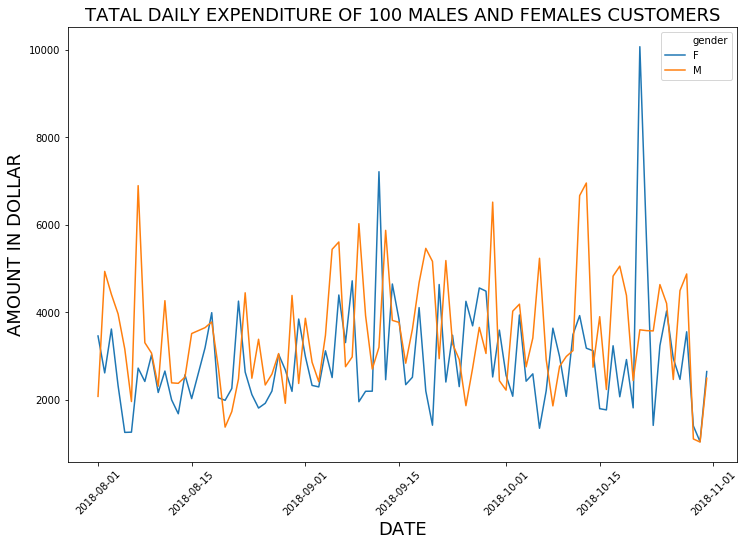

In [58]:
daily_amount_spent_gender = spending_data.groupby(['date','gender'], as_index = False)['amount'].sum()
daily_amount_spent_gender

plt.figure(figsize=(12, 8))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount_spent_gender)
plt.title('TATAL DAILY EXPENDITURE OF 100 MALES AND FEMALES CUSTOMERS',fontsize = 18,color='black')
plt.xlabel('DATE', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize =18)
plt.xticks(rotation = 45)
plt.show()

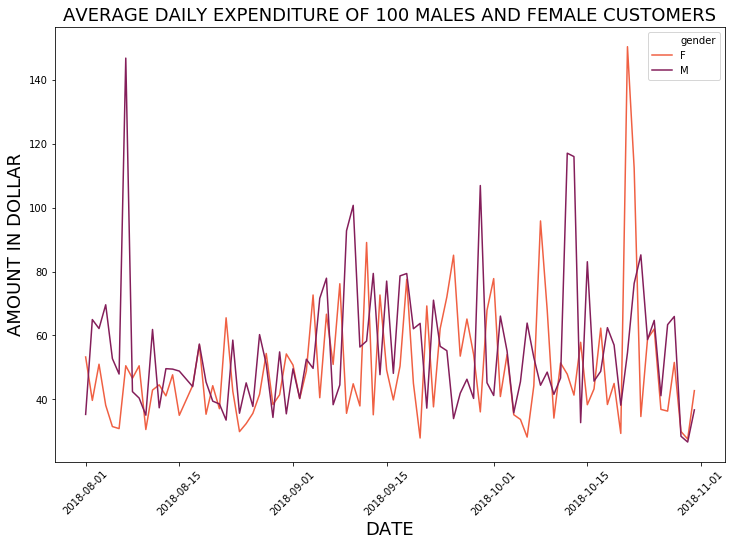

In [59]:
daily_amount_spent_gender = spending_data.groupby(['date','gender'], as_index = False)['amount'].mean()
palette = sns.color_palette('rocket_r', 2)
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount_spent_gender, palette = palette  )
plt.title('AVERAGE DAILY EXPENDITURE OF 100 MALES AND FEMALE CUSTOMERS',fontsize = 18,color='black')
plt.xlabel('DATE', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

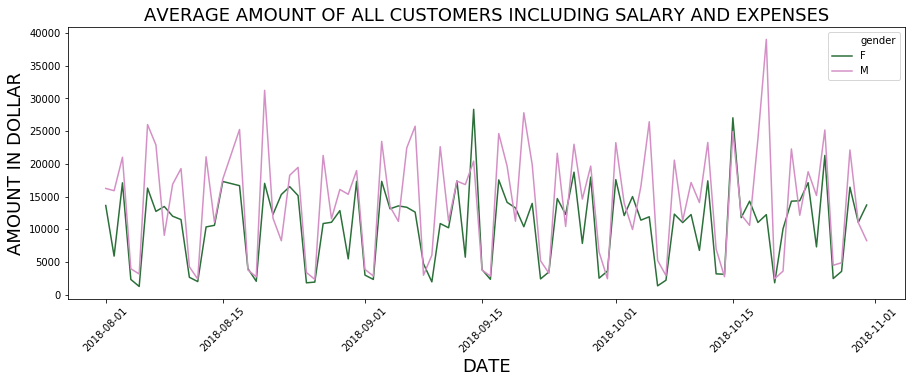

In [60]:
daily_amount = df.groupby(['date','gender'], as_index = False)['amount'].sum()
palette = sns.color_palette('cubehelix', 2)
plt.figure(figsize=(15,5))
sns.lineplot(x = 'date', y = 'amount', hue = 'gender', data = daily_amount, palette = palette  )
plt.title('AVERAGE AMOUNT OF ALL CUSTOMERS INCLUDING SALARY AND EXPENSES',fontsize = 18, color='black')
plt.xlabel('DATE', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [61]:
data_M = spending_data[df.gender == 'M']
data_F = spending_data[df.gender == 'F']
daily_amount_spent_M = data_M.groupby(['merchant_state'])['amount'].sum().reset_index()
daily_amount_spent_F = data_F.groupby(['merchant_state'])['amount'].sum().reset_index()
print(len(daily_amount_spent_M))

8


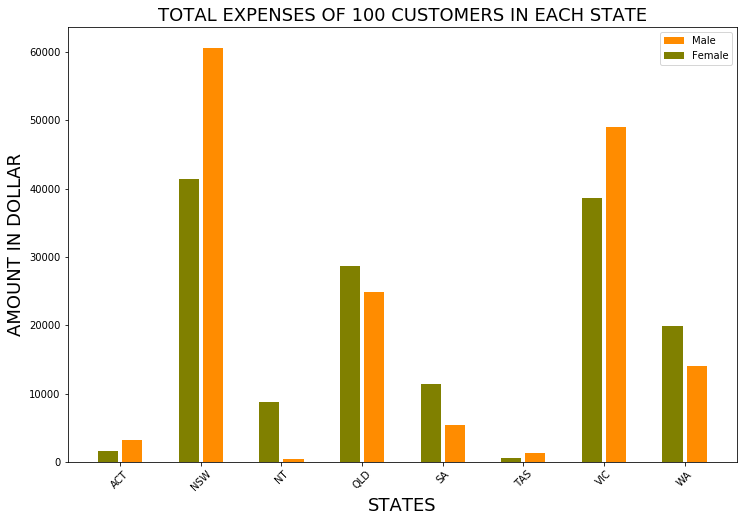

In [62]:
width = 0.25
x = np.arange(len(daily_amount_spent_M.merchant_state))
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar( x + 0.15, 'amount', data = daily_amount_spent_M, width=width, label = 'Male', color ='darkorange')
ax.bar( x - 0.15,  'amount', data = daily_amount_spent_F, width=width,  label = 'Female', color = 'olive')
plt.title('TOTAL EXPENSES OF 100 CUSTOMERS IN EACH STATE',fontsize = 18,color='black')
plt.xticks(np.arange(8), ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'])
plt.xlabel('STATES', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize = 18)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

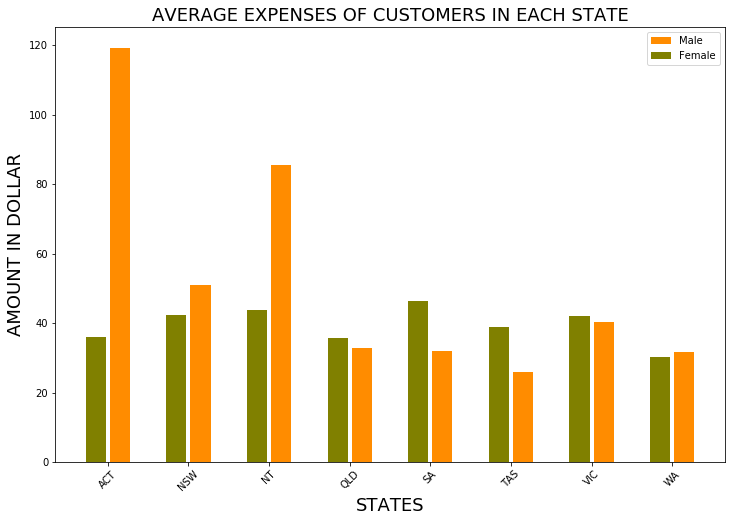

In [63]:
data_M_spending = spending_data[df.gender == 'M']
data_F_spending = spending_data[df.gender == 'F']
daily_amount_spent_M = data_M_spending.groupby(['merchant_state'])['amount'].mean().reset_index()
daily_amount_spent_F = data_F_spending.groupby(['merchant_state'])['amount'].mean().reset_index()

width = 0.25
x = np.arange(len(daily_amount_spent_M.merchant_state))
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar( x + 0.15, 'amount', data = daily_amount_spent_M, width=width, label = 'Male', color = 'darkorange')
ax.bar( x - 0.15,  'amount', data = daily_amount_spent_F, width=width,  label = 'Female', color = 'olive')
plt.title('AVERAGE EXPENSES OF CUSTOMERS IN EACH STATE',fontsize = 18,color='black')
plt.xticks(np.arange(8), ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'])
plt.xlabel('STATES', fontsize = 18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize = 18)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [64]:
data3 = data_M.groupby(['date','merchant_state'], as_index = False)['amount'].sum()
data4 = data_F.groupby(['date','merchant_state'], as_index = False)['amount'].sum()
print(data3.head())

        date merchant_state  amount
0 2018-08-01            NSW  493.11
1 2018-08-01            QLD  171.92
2 2018-08-01             SA   22.86
3 2018-08-01            TAS   17.13
4 2018-08-01            VIC  211.67


In [65]:
print(data4.head())

        date merchant_state   amount
0 2018-08-01            NSW   335.25
1 2018-08-01             NT    73.25
2 2018-08-01            QLD   749.84
3 2018-08-01             SA    39.51
4 2018-08-01            VIC  1207.89


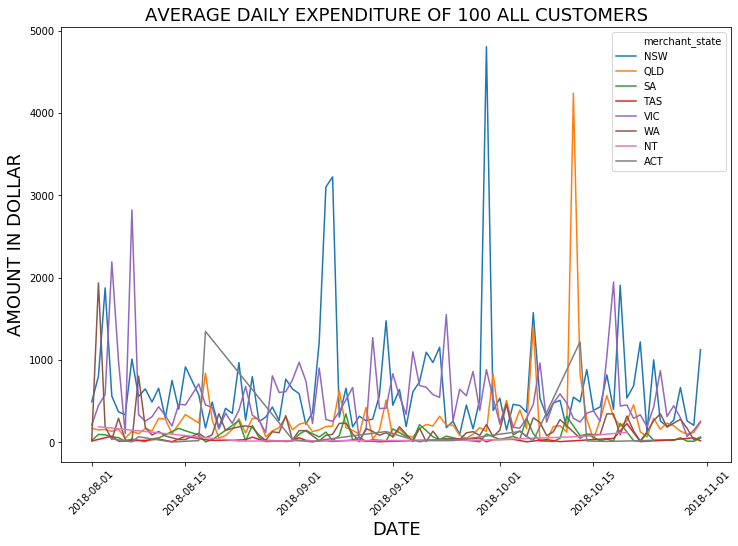

In [66]:
fix, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = 'date', y = 'amount', hue = 'merchant_state', data = data3)
plt.title("AVERAGE DAILY EXPENDITURE OF 100 ALL CUSTOMERS", fontsize = 18, color = 'black')
plt.xlabel("DATE", fontsize = 18)
plt.ylabel("AMOUNT IN DOLLAR", fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

     merchant_suburb    amount
1380          Sydney  21675.44
893        Melbourne  11943.53
1322  South Brisbane  11740.58
880           Mascot  10282.62
978    Mount Gambier   4710.25
855          Malvern   3994.83
870      Maribyrnong   3770.83
1130           Parap   3323.51
196    Brisbane City   2724.45
980    Mount Gravatt   2721.14


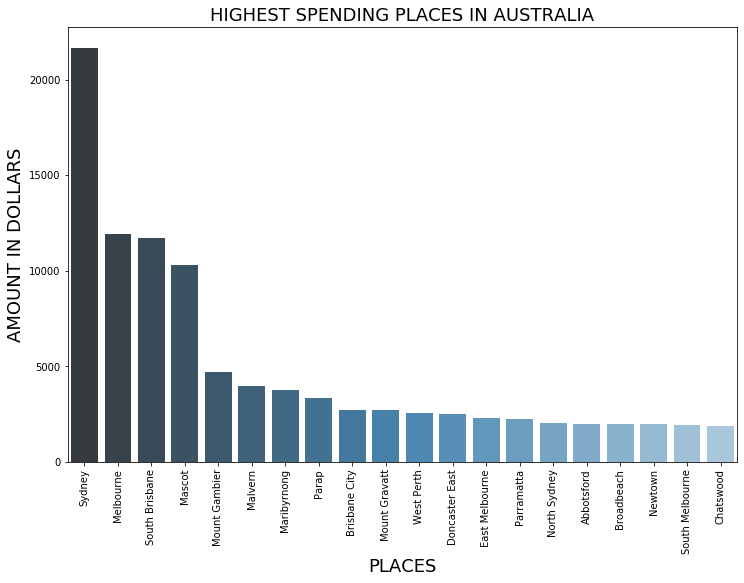

In [67]:
transaction_by_suburban = spending_data.groupby('merchant_suburb')["amount"].sum().reset_index().sort_values(by="amount", ascending = False)
print(transaction_by_suburban[:10])
plt.figure(figsize=(12, 8))
sns.barplot(x= transaction_by_suburban.merchant_suburb[:20], y= transaction_by_suburban.amount[:20], palette = "Blues_d")                             
plt.xlabel("PLACES", fontsize= 18)
plt.ylabel("AMOUNT IN DOLLARS", fontsize= 18)
plt.title("HIGHEST SPENDING PLACES IN AUSTRALIA", fontsize= 18)
plt.xticks(rotation=90)
plt.show()

          account first_name    amount
0   ACC-819621312    Michele  12865.68
1  ACC-3317636250    Kenneth  12327.28
2  ACC-2673069055    Richard  12051.77
3  ACC-1598451071      Diana  12020.21
4   ACC-958000567     Sandra  11964.98


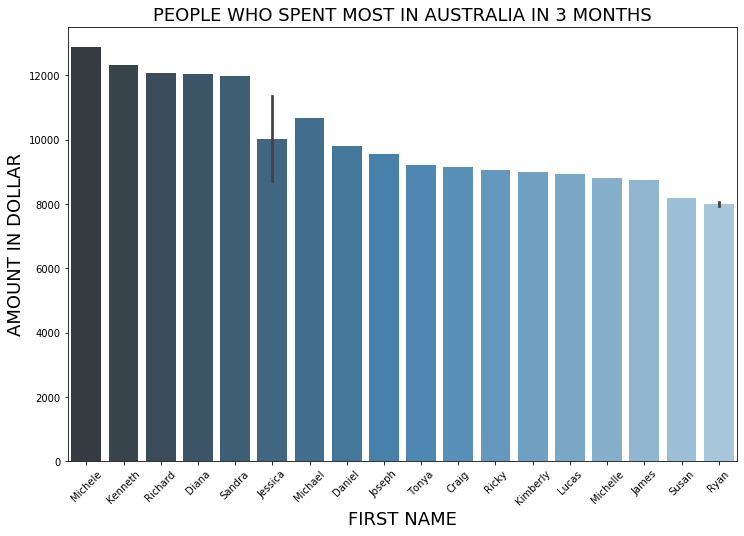

In [68]:
transactions_by_people1 = spending_data.groupby(['account', 'first_name'])['amount'].sum().sort_values( ascending = False).reset_index()
print(transactions_by_people1.head())
plt.figure(figsize=(12, 8))
sns.barplot(x= transactions_by_people1.first_name[:20], y= transactions_by_people1.amount[:20], palette = "Blues_d")                              
plt.xlabel('FIRST NAME', fontsize=18)
plt.ylabel('AMOUNT IN DOLLAR', fontsize= 18)
plt.title('PEOPLE WHO SPENT MOST IN AUSTRALIA IN 3 MONTHS', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

          account first_name    amount
0  ACC-1523339231        Tim  35343.92
1  ACC-1496451953      Ricky  33644.13
2  ACC-3317636250    Kenneth  33081.88
3  ACC-2231965366      Linda  31762.12
4   ACC-240804743    Kenneth  30837.10


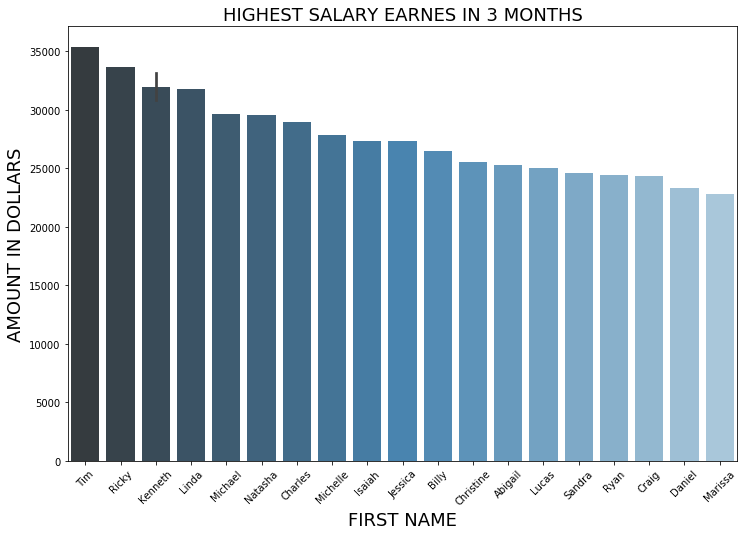

In [69]:
transactions_by_people1 = salary_data.groupby(['account', 'first_name'])['amount'].sum().sort_values( ascending = False).reset_index()
print(transactions_by_people1.head())
plt.figure(figsize=(12, 8))
sns.barplot(x= transactions_by_people1.first_name[:20], y= transactions_by_people1.amount[:20], palette = "Blues_d")                              
plt.xlabel('FIRST NAME', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('HIGHEST SALARY EARNES IN 3 MONTHS', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

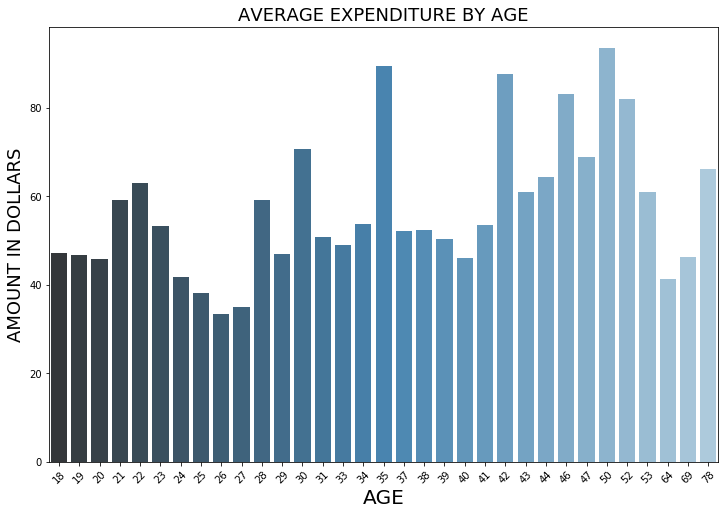

In [70]:
transactions_by_age_group = spending_data.groupby(['age'], as_index = False)['amount'].mean().sort_values(by='amount', ascending = False)
transactions_by_age_group
plt.figure(figsize=(12, 8))
sns.barplot(x= transactions_by_age_group.age, y= transactions_by_age_group.amount, palette = "Blues_d")                              
plt.xlabel('AGE', fontsize=20)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('AVERAGE EXPENDITURE BY AGE', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

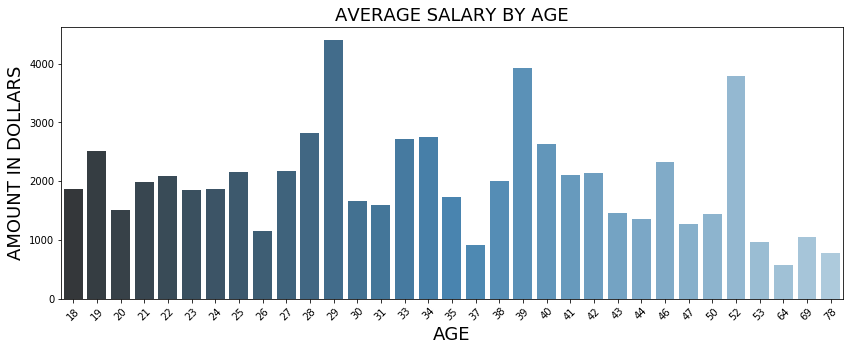

In [71]:
salary_by_age_group = salary_data.groupby(['age'], as_index = False)['amount'].mean().sort_values(by='amount', ascending = False)
plt.figure(figsize=(14,5))
sns.barplot(x= salary_by_age_group.age, y= salary_by_age_group.amount, palette = "Blues_d")                              
plt.xlabel('AGE', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('AVERAGE SALARY BY AGE', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [72]:
wealthy_people = df.groupby(['month', 'account', 'first_name'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
wealthy_people1 = wealthy_people.groupby(['account', 'first_name'])['balance'].mean().sort_values(ascending = False).reset_index()
print(wealthy_people1.head(10))

          account   first_name        balance
0  ACC-2014856841      Patrick  263317.737513
1  ACC-3879258709      Natasha  197294.166681
2  ACC-2650850707        Brian  111650.206673
3  ACC-1523339231          Tim   65421.304599
4  ACC-1334819143  Christopher   62030.001313
5  ACC-4059612845     Jonathan   56808.290040
6   ACC-847145727      Michael   56356.510426
7   ACC-721712940       Andrew   54616.326905
8  ACC-1056639002      Michael   47672.913016
9  ACC-4281711154         Eric   38387.894098


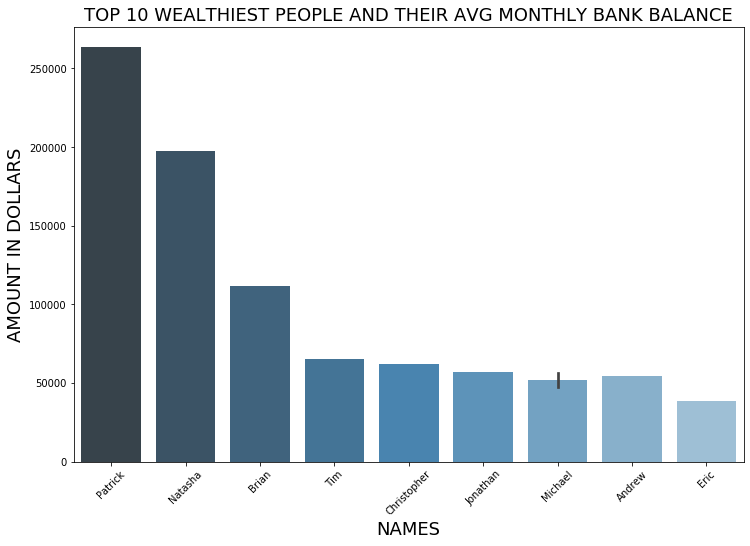

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(x= wealthy_people1.first_name[:10], y= wealthy_people1.balance[:10],  palette = "Blues_d")                              
plt.xlabel('NAMES', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize = 18)
plt.title('TOP 10 WEALTHIEST PEOPLE AND THEIR AVG MONTHLY BANK BALANCE', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [74]:
wealthy_states = df.groupby(['merchant_state', 'month'])['balance'].median().reset_index()
wealthy_states1 = wealthy_states.groupby(['merchant_state'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
print(wealthy_states1)

  merchant_state       balance
0            ACT  11044.641667
4             SA   7589.513333
6            VIC   6287.116667
7             WA   6238.463333
1            NSW   5627.876667
2             NT   5073.195000
5            TAS   4879.930000
3            QLD   3121.155000


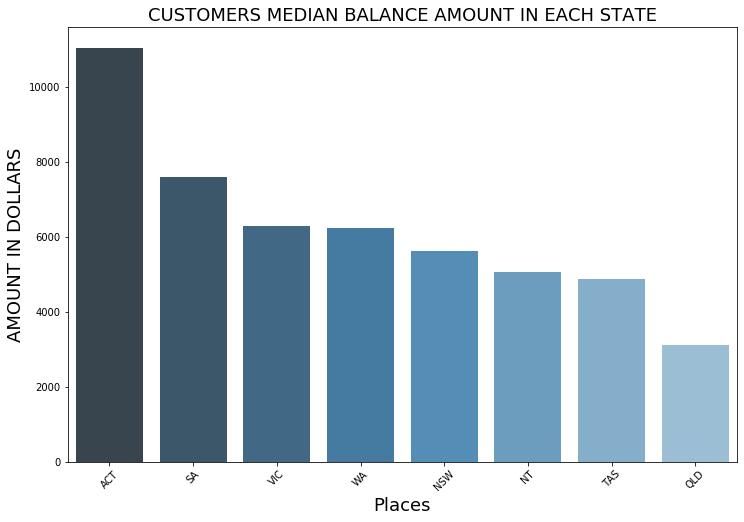

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x= wealthy_states1.merchant_state[:10], y= wealthy_states1.balance[:10], palette = "Blues_d")                              
plt.xlabel('Places', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('CUSTOMERS MEDIAN BALANCE AMOUNT IN EACH STATE', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

    age        balance
0    18    5849.617240
1    19   14736.986219
2    20    5933.973373
3    21   10224.733111
4    22   14847.271905
5    23    9203.373657
6    24    7768.554358
7    25    5538.414893
8    26    3351.659619
9    27    5859.937540
10   28   21406.439638
11   29   14973.528955
12   30    4396.402445
13   31    5517.905647
14   33   61491.350647
15   34   14348.345885
16   35    9170.148851
17   37    3213.841449
18   38   13840.611043
19   39   12095.443251
20   40   54720.766435
21   41    4435.502975
22   42   42472.454784
23   43    9999.321142
24   44    6849.046125
25   46  126729.084706
26   47    5456.441364
27   50   27910.780682
28   52   10162.788961
29   53    2275.852055
30   64    2850.807045
31   69    6218.711471
32   78   54240.641471


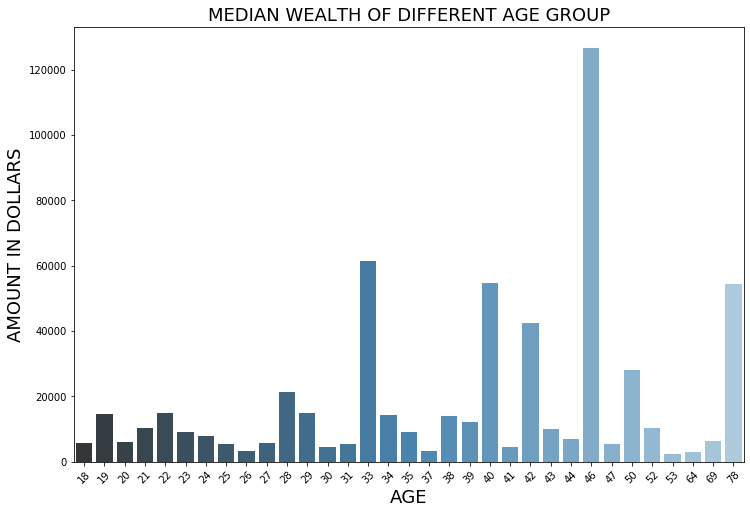

In [76]:
wealthy_age_group = df.groupby(['age',], as_index = False)['balance'].mean()
wealthy_age_group.sort_values(by='balance', ascending = False)
print(wealthy_age_group)
plt.figure(figsize=(12, 8))
sns.barplot(x= wealthy_age_group.age, y= wealthy_age_group.balance, palette = "Blues_d")                              
plt.xlabel('AGE', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('MEDIAN WEALTH OF DIFFERENT AGE GROUP', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [77]:
age_of_wealthy_people = df.groupby(["first_name", "age"]).balance.mean().reset_index().sort_values(by = "balance", ascending = False)
age_of_wealthy_people[:]

,first_name,age,balance
71,Patrick,46,263753.766119
69,Natasha,40,198565.143775
8,Brian,42,111300.797619
94,Tim,40,65420.404231
12,Christopher,33,61491.350647
...,...,...,...
58,Mary,64,2850.807045
90,Stephanie,53,2275.852055
52,Lori,18,2097.971546
21,Diana,26,1735.120675


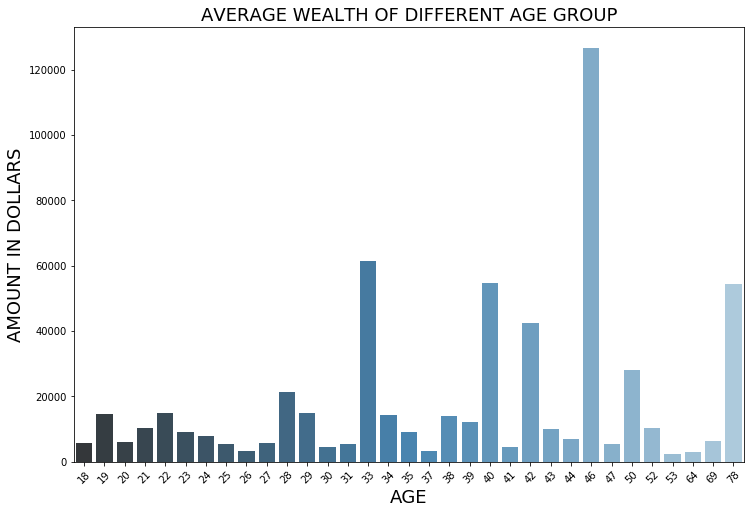

In [78]:
wealthy_age_group = df.groupby(['age'], as_index = False)['balance'].mean().sort_values(by='balance', ascending = False)
plt.figure(figsize=(12, 8))
sns.barplot(x= wealthy_age_group.age, y= wealthy_age_group.balance, palette = "Blues_d")                              
plt.xlabel('AGE', fontsize= 18)
plt.ylabel('AMOUNT IN DOLLARS', fontsize= 18)
plt.title('AVERAGE WEALTH OF DIFFERENT AGE GROUP', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [79]:
wealthy_people = df.groupby(['month', 'account', 'first_name'])['balance'].mean().reset_index().sort_values(by='balance', ascending = False)
wealthy_people1 = wealthy_people.groupby(['account', 'first_name'])['balance'].mean().sort_values(ascending = False).reset_index()
start = 1
end = 5000

for i in range(14):
    x = wealthy_people1[(wealthy_people1["balance"] > start) & (wealthy_people1["balance"] < end)]
    y = (x.account.value_counts().sum()/wealthy_people1.account.value_counts().sum())*100
    print(format(y,".2f"),"% PEOPLE HAVE $", start, "TO", end, "IN THEIR BANK ACCOUNT")
    start += 5000
    end += 5000
    print("_____________")

32.00 % PEOPLE HAVE $ 1 TO 5000 IN THEIR BANK ACCOUNT
_____________
30.00 % PEOPLE HAVE $ 5001 TO 10000 IN THEIR BANK ACCOUNT
_____________
18.00 % PEOPLE HAVE $ 10001 TO 15000 IN THEIR BANK ACCOUNT
_____________
3.00 % PEOPLE HAVE $ 15001 TO 20000 IN THEIR BANK ACCOUNT
_____________
2.00 % PEOPLE HAVE $ 20001 TO 25000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 25001 TO 30000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 30001 TO 35000 IN THEIR BANK ACCOUNT
_____________
4.00 % PEOPLE HAVE $ 35001 TO 40000 IN THEIR BANK ACCOUNT
_____________
0.00 % PEOPLE HAVE $ 40001 TO 45000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 45001 TO 50000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 50001 TO 55000 IN THEIR BANK ACCOUNT
_____________
2.00 % PEOPLE HAVE $ 55001 TO 60000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 60001 TO 65000 IN THEIR BANK ACCOUNT
_____________
1.00 % PEOPLE HAVE $ 65001 TO 70000 IN THEIR BANK ACCOUNT
_________

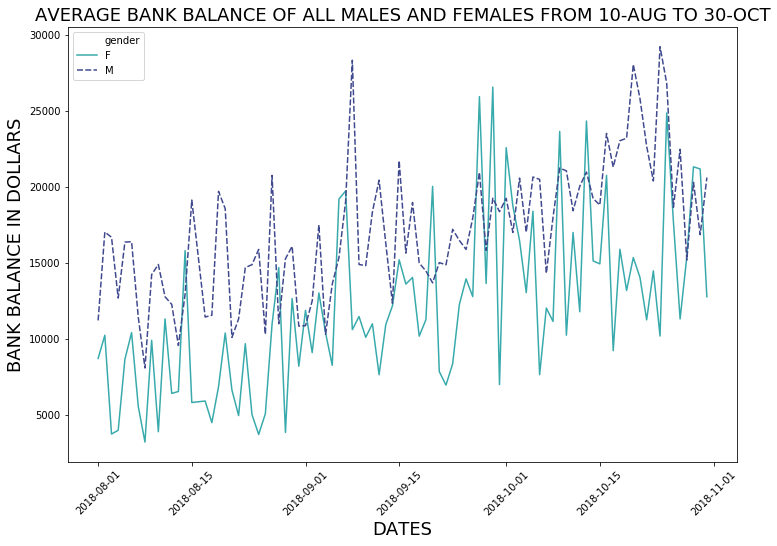

In [80]:
x = df.groupby(['date', 'gender'], as_index = False).balance.mean()
palette = sns.color_palette('mako_r', 2)
plt.subplots(figsize=(12, 8))
sns.lineplot(x.date, x.balance, hue = x.gender, style = x.gender, palette= palette)                            
plt.xlabel('DATES', fontsize=18, color = 'black')
plt.ylabel('BANK BALANCE IN DOLLARS', fontsize=18, color = 'black')
plt.title('AVERAGE BANK BALANCE OF ALL MALES AND FEMALES FROM 10-AUG TO 30-OCT', fontsize= 18, color = 'black')
plt.xticks(rotation = 45)
plt.show()

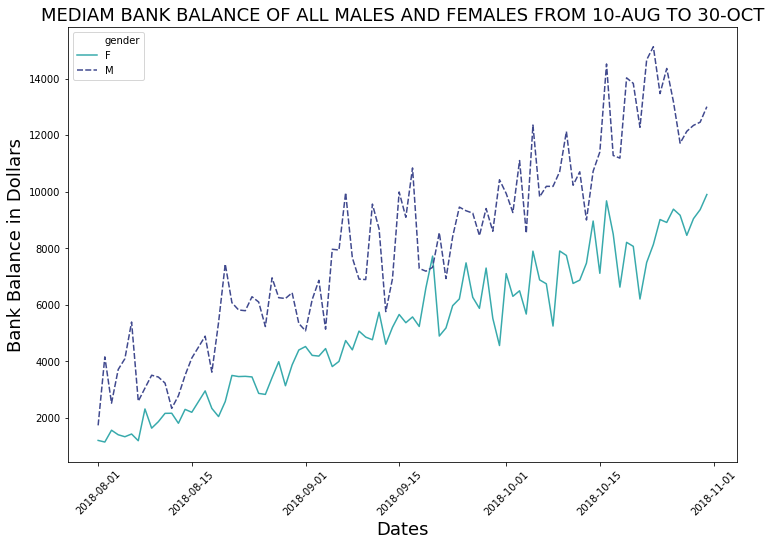

In [81]:
x = df.groupby(['date', 'gender'], as_index = False).balance.median()
palette = sns.color_palette('mako_r', 2)
plt.subplots(figsize=(12, 8))
sns.lineplot(x.date, x.balance, hue = x.gender, style = x.gender, palette= palette)                            
plt.xlabel('Dates', fontsize=18, color = 'black')
plt.ylabel('Bank Balance in Dollars', fontsize=18, color = 'black')
plt.title('MEDIAM BANK BALANCE OF ALL MALES AND FEMALES FROM 10-AUG TO 30-OCT', fontsize=18, color = 'black')
plt.xticks(rotation = 45)
plt.show()